<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DataAnalysis/blob/main/03.%ED%86%B5%EA%B3%84%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch03_04_%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84_%EB%8C%80%ED%91%9C%ED%86%B5%EA%B3%84%EB%9F%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.04. 기초통계 - 대표통계량
---
* 날짜: 2022-05-09
* 이름: 고민수

## 학습내용
    - 최빈값
    - 중앙값
    - 산술 평균
    - 조화 평균
    - 절사 평균


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 대표 통계 - 수치자료형
---

### **| 데이터 생성**

```
# 아래 함수는 랜덤한 정수를 반환합니다.
np.random.randint(low, hight, shape)
# low = 최소값
# hight = 최대값
# shape = 추출할 데이터의 크기
```

* 최소값 1, 최대값 100인 데이터 1000개 생성하기

In [4]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(0)

In [6]:
# 넘파이 배열 `a`로 바인딩
a = np.random.randint(1, 100, 1000)

In [10]:
# 판다스 시리즈 `s`로 바인딩
s= pd.Series(a)

* 데이터 분포 그리기

<AxesSubplot:>

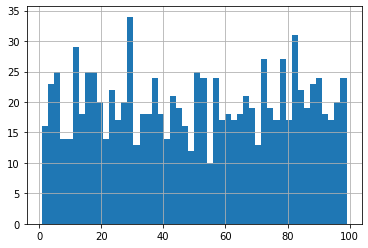

In [12]:
s.hist(bins=50)

### **| 중앙값**
```
np.median(a)
s.median()
```

* 중앙값 계산

In [14]:
np.median(a)

50.0

In [15]:
s.median()

50.0

### **| 산술평균**

가장 보편적으로 사용되는 평균

\begin{align}
\mu = \frac{\sum^n_{i=1}x_i}{n}
\end{align}

\begin{align}
 & \\
 & x_i :? \\
 & n : ?\\ 
\end{align}

```
np.mean(a)
s.mean()
```

* 평균 계산

In [16]:
np.mean(a)

50.39

In [17]:
s.mean()

50.39

### **| 조화 평균**

비율 및 변화율에 등에 대한 평균을 계산할 때 사용

\begin{align}
\mu_{harmonic} = \frac{n}{\sum^n_{i=1}\frac{1}{x_i}}
\end{align}

\begin{align}
 & \\
 & x_i :? \\
 & n : ?\\ 
\end{align}

* 함수 `harmonic` 생성

In [27]:
def harmonic(array):
    temp = [1/i for i in array]
    temp = np.sum(temp)
    return 1/temp

* 조화 평균 계산

In [28]:
harmonic(a)

0.020614144326912345

In [29]:
harmonic(s)

0.020614144326912345

### **| 절사 평균**

데이터에서 $\alpha$ 개를 제거한 후 평균을 내는 방법

\begin{align}
\mu_{cut}=\frac{\sum^{|n(1-\alpha)|}_{i=|n\alpha|} x_i}{ |n(1-\alpha)|-|n\alpha| }
\end{align}

\begin{align}
 & \\
 & x_i :? \\
 & n : ?\\ 
 & \alpha : ?
\end{align}

```
from scipy.stats import trim_mean
trim_mean(x, alpha) 
```


* alpha 비율 0.1일 때 절사 평균 계산

In [30]:
from scipy.stats import trim_mean
trim_mean(a, 0.1) 

50.435

In [31]:
from scipy.stats import trim_mean
trim_mean(s, 0.1) 

50.435

## 대표 통계 - 범주자료형
---

### **| 데이터 생성**

```
# 아래 함수는 리스트 안의 요소를 랜덤하게 반환합니다.
np.random.choice(list, shape)
# list = 카테고리가 들어있는 리스트
# shape = 추출할 데이터의 크기
```

* `A, B, C` 세개의 카테고리에서 데이터 1000개 생성하기

In [61]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(seed=0)
# 넘파이 배열 `a`로 바인딩
a = np.random.choice(["A","B","C"], 1000)
# 판다스 시리즈 `s`로 바인딩
s = pd.Series(np.random.choice(["A","B","C"], 1000))

* 데이터 분포 그리기

(array([337.,   0.,   0.,   0.,   0., 335.,   0.,   0.,   0., 328.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

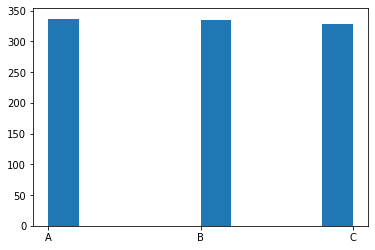

In [64]:
plt.hist(a)

<AxesSubplot:>

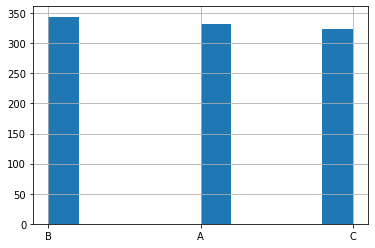

In [62]:
s.hist()

### **| 최빈값**

```
s.value_counts()

from scipy.stats import mode
mode(a)
```

* `value_counts()` 사용하기

In [65]:
s.value_counts()

B    344
A    332
C    324
dtype: int64

* 사이파이 함수 `mode` 사용하기

In [68]:
from scipy.stats import mode
mode(a)

ModeResult(mode=array(['A'], dtype='<U1'), count=array([337]))

## 예제
---

#### **예제 01**

1. 평균이 200만원이고 표준편차가 50만원인 정규분포를 따르는 데이터를 아래 넘파이 함수를 이용해 100개 생성하세요.
```
np.random.normal(mu, std, n)
```

2. 위에서 생성한 데이터의 히스토그램을 그리세요

3. 10억원의 소득을 가지는 데이터 한개를 위 데이터에 추가하세요.

4. 데이터의 히스토그램을 그리세요

5. 10억원의 소득을 추가하기 전과 후의 데이터의 산술평균을 비교하세요.

5. 10억원의 소득을 추가하기 전과 후의 데이터의 절사평균(alpha=0.1)을 비교하세요.

In [103]:
# 평균이 200만원이고 표준편차가 50만원인 정규분포를 따르는 데이터를 아래 넘파이 함수를 이용해 100개 생성하세요.

arr1 = np.random.normal(200, 50, 100)

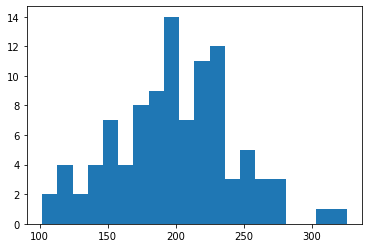

In [104]:
# 위에서 생성한 데이터의 히스토그램을 그리세요
plt.hist(arr1, bins=20)
plt.show()

In [106]:
# 10억원의 소득을 가지는 데이터 한개를 위 데이터에 추가하세요.
arr2 = np.append(arr,[10000])

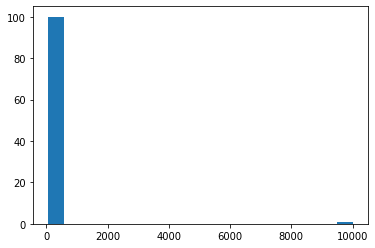

In [107]:
# 위에서 생성한 데이터의 히스토그램을 그리세요
plt.hist(arr2, bins=20)
plt.show()

In [108]:
# 10억원의 소득을 추가하기 전과 후의 데이터의 산술평균을 비교하세요.
np.mean(arr1)

199.3563807217519

In [109]:
np.mean(arr2)

297.1869681075893

In [110]:
# 10억원의 소득을 추가하기 전과 후의 데이터의 절사평균(alpha=0.1)을 비교하세요.
from scipy.stats import trim_mean
trim_mean(arr1, 0.1)

199.17725251347778

In [111]:
trim_mean(arr2, 0.1)

202.3067009743536

#### **예제 02**

타이타닉 데이터셋을 가져오고, 각 변수들의 대표값을 정리하세요.

In [252]:
df = sns.load_dataset('titanic')

In [253]:
df["deck"] = df["deck"].astype(object)
df["sex"]=df["sex"].replace({"male" : 1, "female":0})
df["embarked"]=df["embarked"].replace({"S" : 0, "C":1, "Q":2})
df["class"]=df["class"].replace({"First" : 1, "Second":2, "Third":3})
df["who"]=df["who"].replace({"man" : 1, "woman":0, "child":2})
df["adult_male"]=df["adult_male"].replace({True : 1, False:0})
df["deck"]=df["deck"].replace({"A" : 1, "B":2,"C" : 3, "D":4,"E" : 5, "F":6,"G" : 7, np.nan:0})
df["alive"]=df["alive"].replace({"yes" : 1, "no":0})
df["alone"]=df["alone"].replace({True : 1, False:0})
df['deck'] = df['deck'].replace(np.nan,0)
df = df.drop("embark_town", axis=1)
df["deck"] = df["deck"].astype(int)
df["class"] = df["class"].astype(int)

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         714 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    889 non-null    float64
 8   class       891 non-null    int32  
 9   who         891 non-null    int64  
 10  adult_male  891 non-null    int64  
 11  deck        891 non-null    int32  
 12  alive       891 non-null    int64  
 13  alone       891 non-null    int64  
dtypes: float64(3), int32(2), int64(9)
memory usage: 90.6 KB


In [256]:
def print1(feature):
    a= df[feature].mean()
    b = df[feature].median()
    c = df[feature].mode()
    print(f"{feature}.mean : {a}\n{feature}.median : {b}\n{feature}.mode : {c}")

In [258]:
for i in df.columns:
    print1(i)
    print()

survived.mean : 0.3838383838383838
survived.median : 0.0
survived.mode : 0    0
Name: survived, dtype: int64

pclass.mean : 2.308641975308642
pclass.median : 3.0
pclass.mode : 0    3
Name: pclass, dtype: int64

sex.mean : 0.6475869809203143
sex.median : 1.0
sex.mode : 0    1
Name: sex, dtype: int64

age.mean : 29.69911764705882
age.median : 28.0
age.mode : 0    24.0
Name: age, dtype: float64

sibsp.mean : 0.5230078563411896
sibsp.median : 0.0
sibsp.mode : 0    0
Name: sibsp, dtype: int64

parch.mean : 0.38159371492704824
parch.median : 0.0
parch.mode : 0    0
Name: parch, dtype: int64

fare.mean : 32.204207968574636
fare.median : 14.4542
fare.mode : 0    8.05
Name: fare, dtype: float64

embarked.mean : 0.36220472440944884
embarked.median : 0.0
embarked.mode : 0    0.0
Name: embarked, dtype: float64

class.mean : 2.308641975308642
class.median : 3.0
class.mode : 0    3
Name: class, dtype: int32

who.mean : 0.7890011223344556
who.median : 1.0
who.mode : 0    1
Name: who, dtype: int64

ad